In [1]:
import keras
from keras import models
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS * NUM_COLS))
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.summary()



Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 11s 191us/step - loss: 0.2265 - acc: 0.9294 - val_loss: 0.1058 - val_acc: 0.9681
Epoch 2/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.0837 - acc: 0.9741 - val_loss: 0.0796 - val_acc: 0.9764
Epoch 3/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0551 - acc: 0.9833 - val_loss: 0.0764 - val_acc: 0.9776
Epoch 4/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0379 - acc: 0.9881 - val_loss: 0.0692 - val_acc: 0.9820
Epoch 5/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.0283 - acc: 0.9909 - val_loss: 0.0796 - val_acc: 0.9790
Epoch 6/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.0218 - acc

In [2]:
from keras import optimizers
sgd=keras.optimizers.SGD(lr=0.01, momentum=0.0, nesterov=False)

model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.0043 - acc: 0.9984 - val_loss: 0.0960 - val_acc: 0.9812
Epoch 2/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0026 - acc: 0.9992 - val_loss: 0.0925 - val_acc: 0.9812
Epoch 3/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.0020 - acc: 0.9996 - val_loss: 0.0905 - val_acc: 0.9819
Epoch 4/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.0017 - acc: 0.9996 - val_loss: 0.0892 - val_acc: 0.9826
Epoch 5/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.0014 - acc: 0.9997 - val_loss: 0.0882 - val_acc: 0.9827
Epoch 6/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0013 - acc: 0.9998 - val_loss: 0.0874 - val_acc: 0.9830
Epoch 7/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.0012 - acc: 0.9999 - val_loss: 0.0868 - val_acc

**SGD**

Test loss: 0.08664665951977013


Test accuracy: 0.9847

In [3]:
from keras import optimizers
rms=keras.optimizers.RMSprop(lr=0.001, rho=0.9)

# Compile model using above optimizer
model.compile(optimizer=rms,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.0099 - acc: 0.9967 - val_loss: 0.0951 - val_acc: 0.9826
Epoch 2/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.0082 - acc: 0.9975 - val_loss: 0.1234 - val_acc: 0.9792
Epoch 3/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.0066 - acc: 0.9978 - val_loss: 0.1106 - val_acc: 0.9830
Epoch 4/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0068 - acc: 0.9978 - val_loss: 0.1162 - val_acc: 0.9817
Epoch 5/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0063 - acc: 0.9981 - val_loss: 0.1164 - val_acc: 0.9830
Epoch 6/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0060 - acc: 0.9984 - val_loss: 0.1228 - val_acc: 0.9827
Epoch 7/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.0057 - acc: 0.9985 - val_loss: 0.1278 - val_acc

**RMSprop**

Test loss: 0.12649620679515766


Test accuracy: 0.984

In [4]:
from keras import optimizers
ada=keras.optimizers.Adagrad(lr=0.01)

# Compile model using above optimizer
model.compile(optimizer=ada,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0321 - acc: 0.9957 - val_loss: 0.1147 - val_acc: 0.9841
Epoch 2/10
60000/60000 [==============================] - 2s 28us/step - loss: 3.9833e-04 - acc: 1.0000 - val_loss: 0.1094 - val_acc: 0.9847
Epoch 3/10
60000/60000 [==============================] - 2s 28us/step - loss: 3.0473e-04 - acc: 1.0000 - val_loss: 0.1092 - val_acc: 0.9845
Epoch 4/10
60000/60000 [==============================] - 2s 27us/step - loss: 2.9592e-04 - acc: 1.0000 - val_loss: 0.1092 - val_acc: 0.9845
Epoch 5/10
60000/60000 [==============================] - 2s 28us/step - loss: 2.9189e-04 - acc: 1.0000 - val_loss: 0.1092 - val_acc: 0.9847
Epoch 6/10
60000/60000 [==============================] - 2s 28us/step - loss: 2.8915e-04 - acc: 1.0000 - val_loss: 0.1092 - val_acc: 0.9847
Epoch 7/10
60000/60000 [==============================] - 2s 27us/step - loss: 2.8716e-04 - acc: 1.0000 - va

**Adagard**

Test loss: 0.10811926535155592


Test accuracy: 0.9848

In [5]:
from keras import optimizers
adelta=keras.optimizers.Adadelta(lr=1.0, rho=0.95)

# Compile model using above optimizer
model.compile(optimizer=adelta,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 39us/step - loss: 2.8222e-04 - acc: 1.0000 - val_loss: 0.1095 - val_acc: 0.9847
Epoch 2/10
60000/60000 [==============================] - 2s 36us/step - loss: 2.8000e-04 - acc: 1.0000 - val_loss: 0.1097 - val_acc: 0.9847
Epoch 3/10
60000/60000 [==============================] - 2s 36us/step - loss: 2.7849e-04 - acc: 1.0000 - val_loss: 0.1099 - val_acc: 0.9847
Epoch 4/10
60000/60000 [==============================] - 2s 34us/step - loss: 2.7744e-04 - acc: 1.0000 - val_loss: 0.1100 - val_acc: 0.9849
Epoch 5/10
60000/60000 [==============================] - 2s 34us/step - loss: 2.7661e-04 - acc: 1.0000 - val_loss: 0.1101 - val_acc: 0.9849
Epoch 6/10
60000/60000 [==============================] - 2s 33us/step - loss: 2.7596e-04 - acc: 1.0000 - val_loss: 0.1102 - val_acc: 0.9849
Epoch 7/10
60000/60000 [==============================] - 2s 34us/step - loss: 2.7542e-04 - acc: 1.0000 

**Adadelta**

Test loss: 0.10811314213337339


Test accuracy: 0.985

In [6]:
from keras import optimizers
adam=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

# Compile model using above optimizer
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.0204 - acc: 0.9950 - val_loss: 0.1277 - val_acc: 0.9819
Epoch 2/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.0124 - acc: 0.9967 - val_loss: 0.1096 - val_acc: 0.9822
Epoch 3/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0131 - acc: 0.9962 - val_loss: 0.1332 - val_acc: 0.9794
Epoch 4/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.0112 - acc: 0.9972 - val_loss: 0.1251 - val_acc: 0.9788
Epoch 5/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.0064 - acc: 0.9980 - val_loss: 0.1356 - val_acc: 0.9783
Epoch 6/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.0108 - acc: 0.9968 - val_loss: 0.1069 - val_acc: 0.9824
Epoch 7/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.0094 - acc: 0.9974 - val_loss: 0.1280 - val_acc

**Adam**

Test loss: 0.11245599556569041


Test accuracy: 0.9806

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 35us/step - loss: 2.7820e-04 - acc: 1.0000 - val_loss: 0.1219 - val_acc: 0.9859
Epoch 2/10
60000/60000 [==============================] - 2s 32us/step - loss: 2.6932e-04 - acc: 1.0000 - val_loss: 0.1210 - val_acc: 0.9860
Epoch 3/10
60000/60000 [==============================] - 2s 32us/step - loss: 2.6890e-04 - acc: 1.0000 - val_loss: 0.1210 - val_acc: 0.9860
Epoch 4/10
60000/60000 [==============================] - 2s 31us/step - loss: 2.6886e-04 - acc: 1.0000 - val_loss: 0.1212 - val_acc: 0.9862
Epoch 5/10
60000/60000 [==============================] - 2s 31us/step - loss: 2.6884e-04 - acc: 1.0000 - val_loss: 0.1217 - val_acc: 0.9859
Epoch 6/10
60000/60000 [==============================] - 2s 30us/step - loss: 2.6882e-04 - acc: 1.0000 - val_loss: 0.1219 - val_acc: 0.9859
Epoch 7/10
60000/60000 [==============================] - 2s 31us/step - loss: 2.6880e-04 - acc: 1.0000 

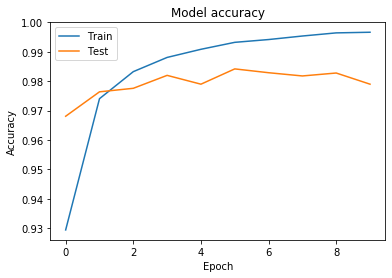

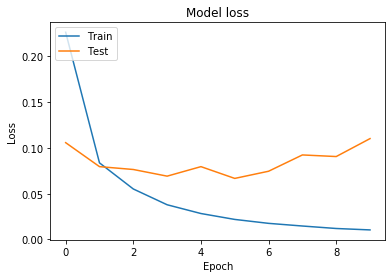

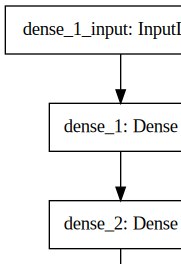

In [8]:
from keras import optimizers
import matplotlib.pyplot as plt
adamax=keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999)

# Compile model using above optimizer
model.compile(optimizer=adamax,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


SVG(model_to_dot(model).create(prog='dot', format='svg'))

**Adamax**

Test loss: 0.11826916954151595


Test accuracy: 0.9851

In [9]:
from keras import optimizers
nadam=keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999)


# Compile model using above optimizer
model.compile(optimizer=nadam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.0404 - acc: 0.9926 - val_loss: 0.1570 - val_acc: 0.9738
Epoch 2/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.0254 - acc: 0.9936 - val_loss: 0.1371 - val_acc: 0.9786
Epoch 3/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0213 - acc: 0.9941 - val_loss: 0.1229 - val_acc: 0.9800
Epoch 4/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0244 - acc: 0.9931 - val_loss: 0.1292 - val_acc: 0.9788
Epoch 5/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.0163 - acc: 0.9956 - val_loss: 0.1072 - val_acc: 0.9813
Epoch 6/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.0153 - acc: 0.9959 - val_loss: 0.1141 - val_acc: 0.9816
Epoch 7/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.0167 - acc: 0.9954 - val_loss: 0.1053 - val_acc

**Nadam**

Test loss: 0.12597350687139072


Test accuracy: 0.9813